<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5505-Advanced-Machine-Learning-for-Data-Scientists-/blob/main/VamsiKrishnaBharghavaMuktinutalapati_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Loading the File using Pandas Library

df=pd.read_csv('winequality-red.csv')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Using Shape function to know the Columns and Rows
df.shape

(1599, 12)

In [ ]:
#using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Finding if there are any null values in fields of dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From the above results, it is evident that dataset does not have any null values. Hence imputing the values is not necessary.

In [ ]:
#calculating the descriptive statistics of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36c15b0090>,
      dtype=object)

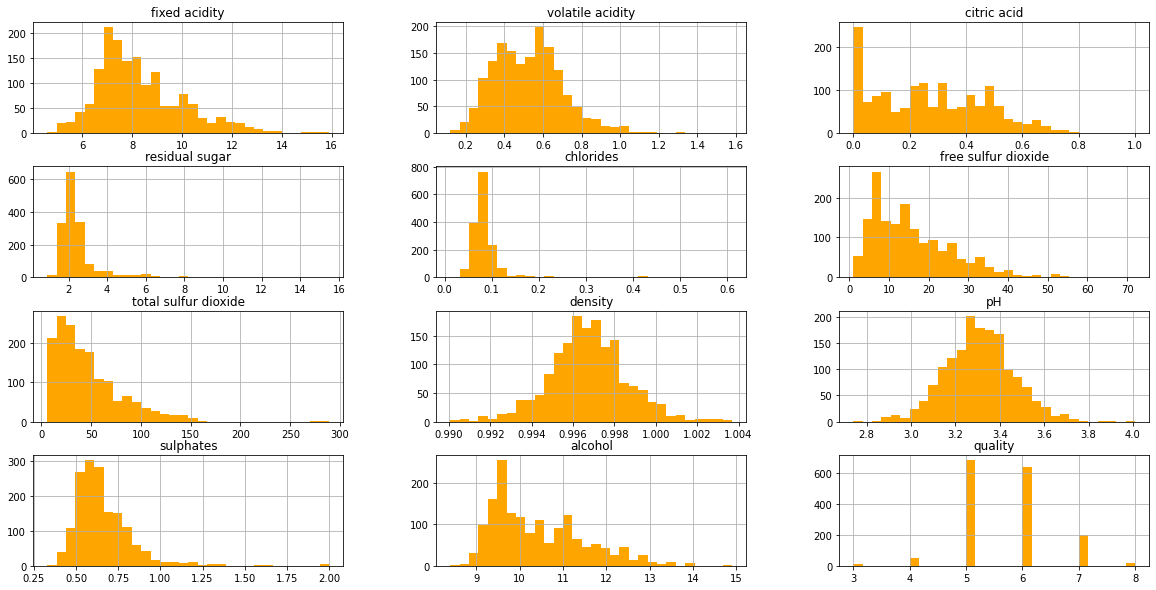

In [ ]:
#plotting the distributions of each field 

field_distributions=df.hist(figsize=(20,10),bins=30,color='Orange')
field_distributions

Finding Correlation scores for all fields to the dependent variable (Quality) 

In [ ]:
fields_correlation=df.corr()
fields_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Plotting heat map of correlation scores for easy understanding

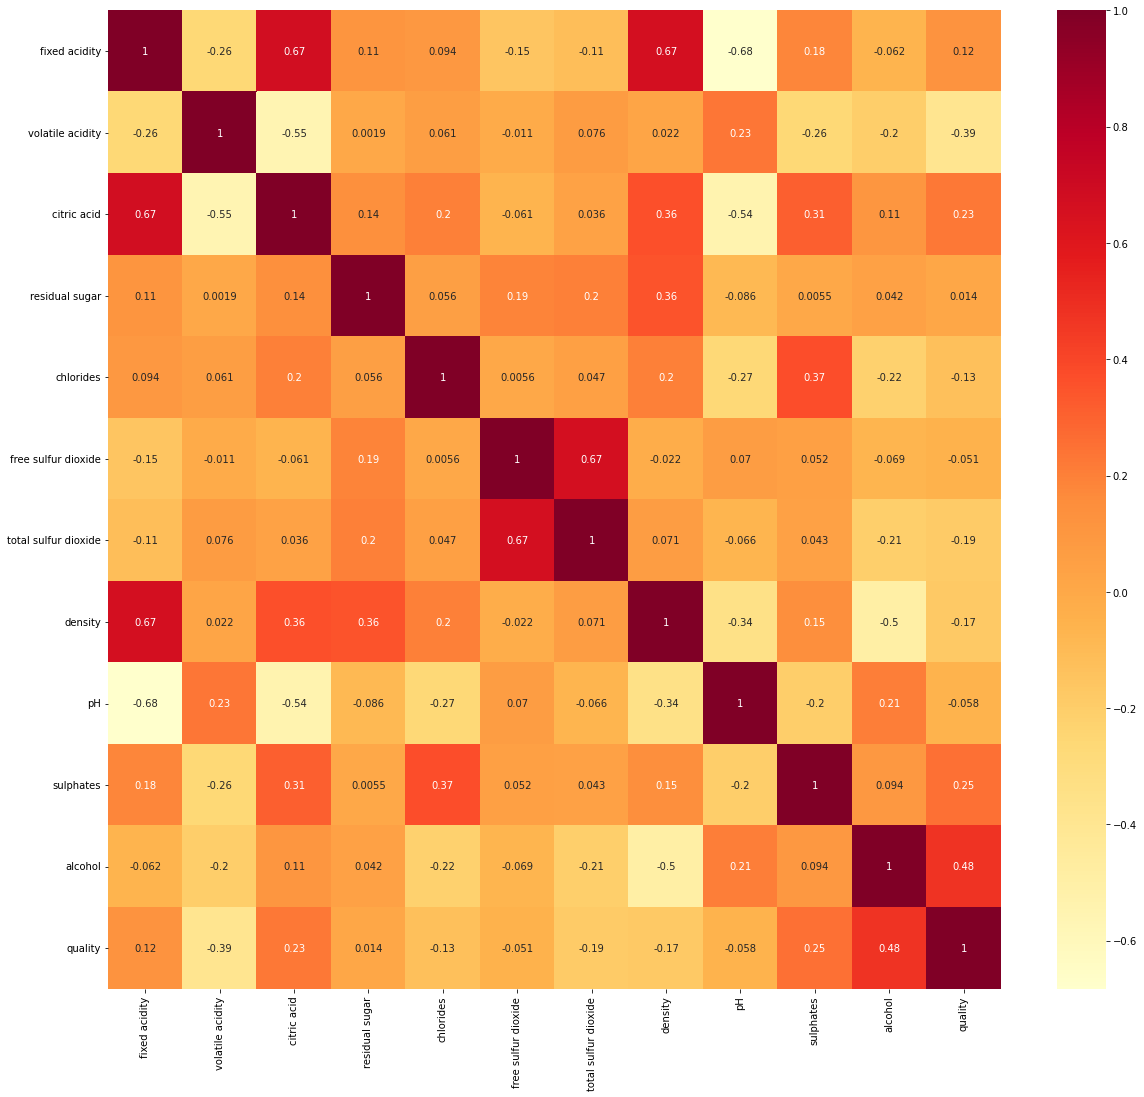

In [ ]:
plt.figure(figsize=(20,18))
corr_heatmap=sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')


From the above heat map, it is evident that fields alcohol,sulphates, citric acid, fixed acity are positively correlated. 

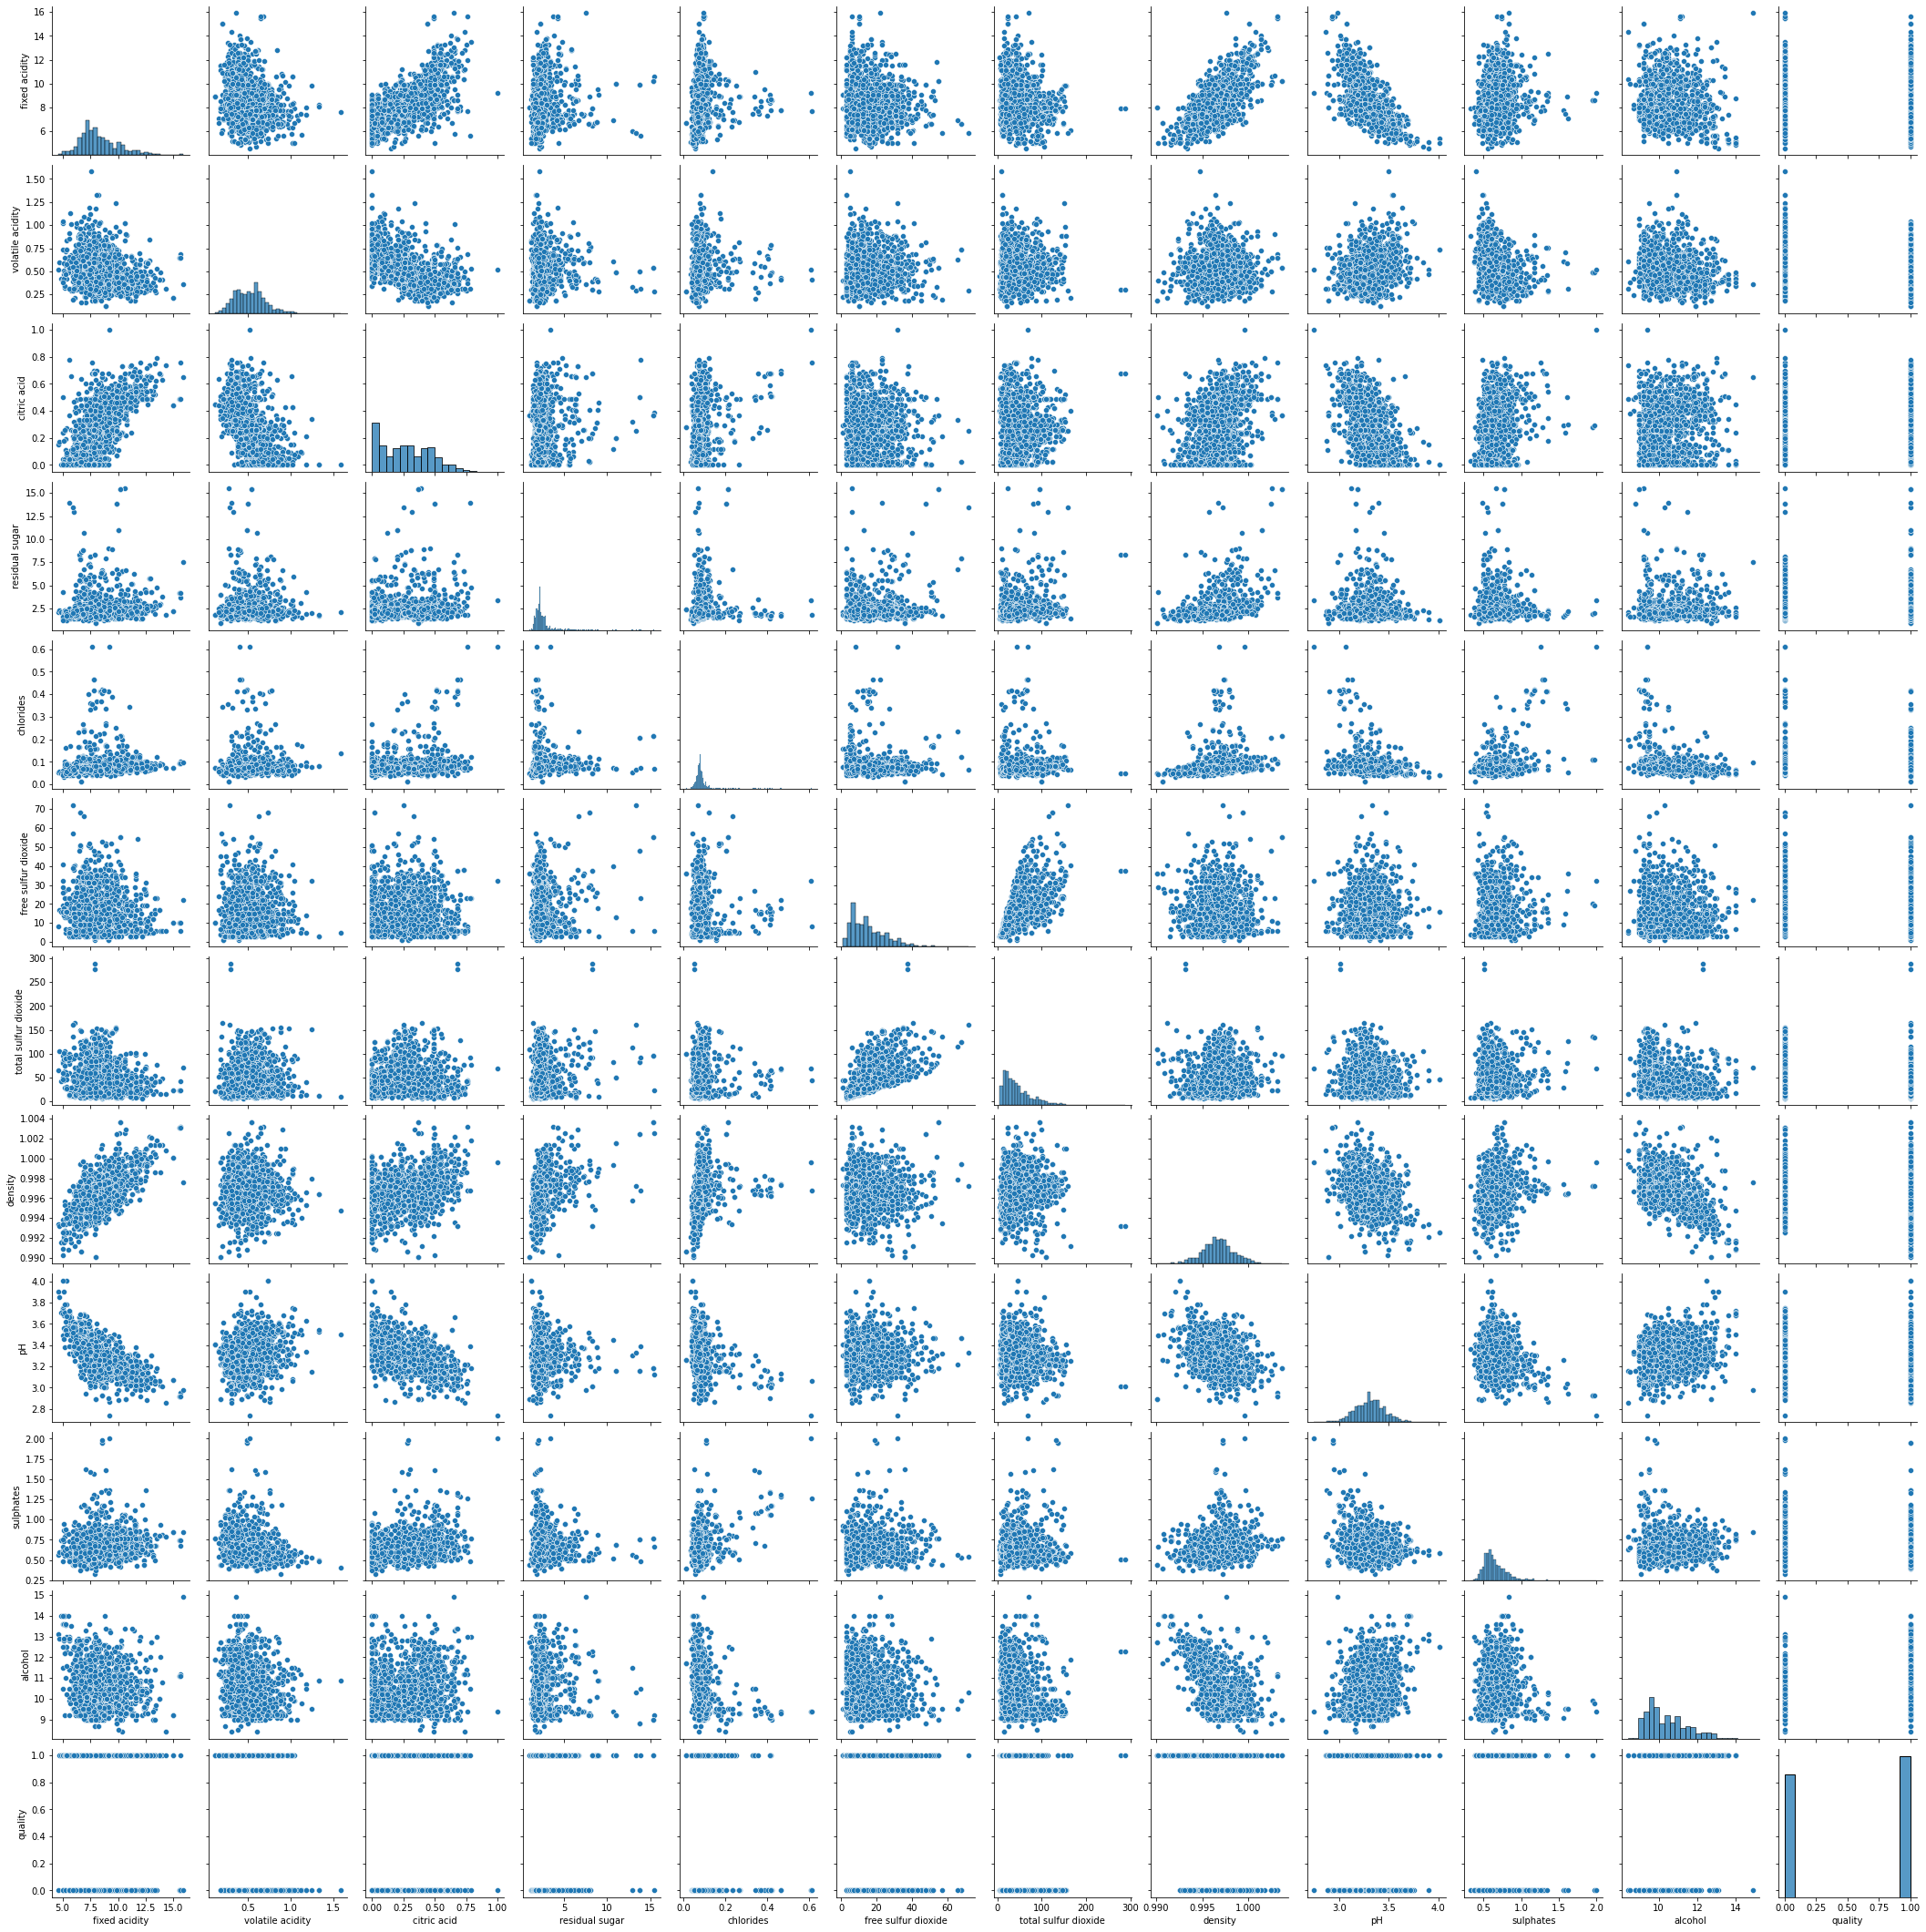

In [ ]:
#sns.pairplot(df,kind='scatter',palette='Dark2')
sns.pairplot(df)

Data Distribution of Dependent Variable (Quality)

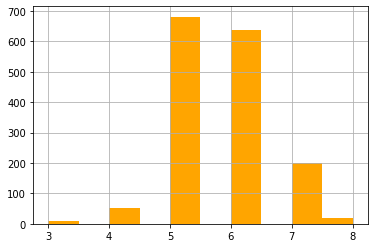

In [ ]:
Quality_distribution=df['quality'].hist(color='Orange')

In [ ]:
print('Data distribution in the binary target variable: \n', df.quality.value_counts())

Data distribution in the binary target variable: 
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


From the above distribution, it is seen that more number of observations have 5 and 6 type of classes where 3 and 8 type classes are very few accounting to the lesser numbers while splitting data into training and testing. This split might not have proper count of lesser type values which results in improper training of models for the classes type 3 or 8. Hence, we will be converting the dependent variable Quality to binary 0 or 1.

Class 3, 4, and 5 are turned into the "low quality" class and 6,7,8 are considered as "high quality"


In [ ]:
df['quality']=np.where(df['quality']>5, 1,0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
quality_Binary=df['quality'].value_counts()
quality_Binary

1    855
0    744
Name: quality, dtype: int64

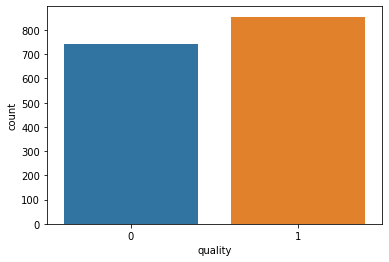

In [ ]:
#Counts of Quality 
sns.countplot(x='quality', data=df)
plt.show()

From the above plot, we can say that data is optimally balanced with slightly higher in 1 which says that classes types of sum of 6,7,8 are more than sum of 3,4,5.

**Developing the Logistic Regression Model**

We only select independent variables that most affect the dependent variable Quality using correlation score.

In this model building, we are considering 

X: 'volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'chlorides', 'total sulfur dioxide', 'density'

Y: 'quality' (binary)

In [ ]:
#splitting data into Training Data (80%) and Test Data (20%)
from sklearn.model_selection import train_test_split
X= df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'chlorides', 'total sulfur dioxide', 'density']]
y = df['quality']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,random_state=10)
print('shapes of X_train  and y_train are :',X_train.shape,y_train.shape)
print('shapes of X_test  and y_test are :',X_test.shape,y_test.shape)

shapes of X_train  and y_train are : (1279, 7) (1279,)
shapes of X_test  and y_test are : (320, 7) (320,)


Building Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
regression_model=LogisticRegression()
regression_model

LogisticRegression()

Fitting Logistic Regression model into training set

In [ ]:
regression_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

When trying to fit the model, we have got an convergence warning due to the Number of iteration reached maximum limit. In order to overcome this warning, we need to scale the data.

In [ ]:
# Scale the data in the independent variables and then split data for training and test
from sklearn.preprocessing import StandardScaler
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split (StandardScaler().fit_transform (X), y, train_size = 0.8,random_state=10)
print ('Shapes of X_train, y_train: ', X_train_s.shape, y_train_s.shape)
print ('Shapes of X_test, y_test: ', X_test_s.shape, y_test_s.shape)

Shapes of X_train, y_train:  (1279, 7) (1279,)
Shapes of X_test, y_test:  (320, 7) (320,)


In [ ]:
#Applying Logistic Regression model on Scaled Variables
regression_scaledmodel=LogisticRegression()
regression_scaledmodel

LogisticRegression()

In [ ]:
# Fit the model into the training set
regression_scaledmodel.fit(X_train_s, y_train_s)

LogisticRegression()

In [ ]:
# Use the model to predict y in the test set
y_test_pred = regression_scaledmodel.predict(X_test_s)

In [ ]:
# Let look into the estimate probability of classess in the test set
y_test_pred_prob = regression_scaledmodel.predict_proba (X_test_s)
print(y_test_pred_prob[:10])
print (y_test_s[:10])

[[0.38035742 0.61964258]
 [0.78811751 0.21188249]
 [0.5546928  0.4453072 ]
 [0.38893809 0.61106191]
 [0.6503458  0.3496542 ]
 [0.08290859 0.91709141]
 [0.13491197 0.86508803]
 [0.33590716 0.66409284]
 [0.72733367 0.27266633]
 [0.91956403 0.08043597]]
1518    0
1246    0
544     1
1343    1
428     0
1190    1
1056    1
361     1
367     0
1401    0
Name: quality, dtype: int64


In [ ]:
# Evaluate the model with acurracy scores
print('Accuracy of the model in the train set:',(regression_scaledmodel.score(X_train_s, y_train_s)))
print('Accuracy of the model in the test set:',(regression_scaledmodel.score(X_test_s, y_test_s)))

Accuracy of the model in the train set: 0.7513682564503519
Accuracy of the model in the test set: 0.728125


The above accuracy scores proves that the model is not overfitting. But the accuracy score is not so high.

In [ ]:
# Evaluate with confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_s, y_test_pred)

array([[103,  40],
       [ 47, 130]])

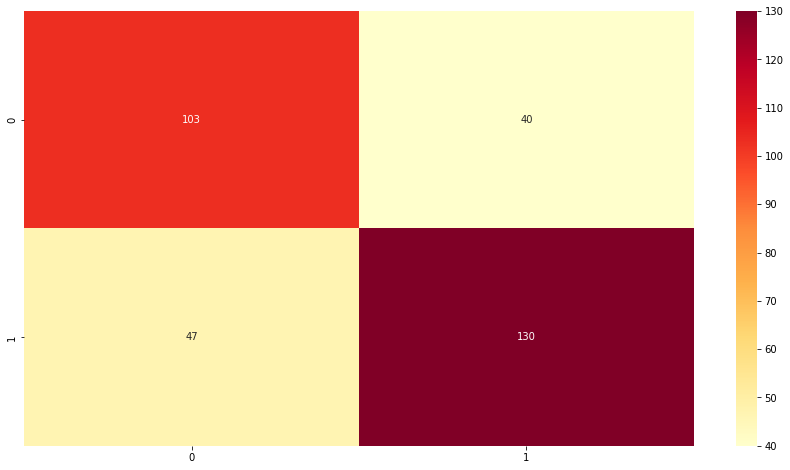

In [ ]:
#Visualizing Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test_s, y_test_pred),annot=True, fmt='g',cmap='YlOrRd')

This metric means that 103 instances were correctly classified into 1 (True Positive), and 130 were correctly classified into 0 (True Negative). 47 instances which were actually 0, but were predicted as 1. In contrast, 40 instances were actually 1, but were predicted as 0. Based on this confusion matrix, we can calculate precision, recall, F1 score, etc.

In [ ]:
# Print a performance report of the model 
from sklearn.metrics import classification_report
print('Model performance: \n', classification_report(y_test_s, y_test_pred))

Model performance: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70       143
           1       0.76      0.73      0.75       177

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

